# Password Strength Classifier


Importing the dependencies

In [1]:
!pip install xgboost --upgrade --quiet

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import confusion_matrix,classification_report

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import random

In [11]:
dataset = pd.read_csv("data.csv", error_bad_lines = False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [12]:
# Lets check the head of our data

dataset.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [13]:
# Lets check the shape of data

dataset.shape

(669640, 2)

In [14]:
# Checking the unique values in strength

dataset["strength"].unique()

array([1, 2, 0])

## There are only 3 classes in strength
### 0->Password is weak
### 1->Normal password
### 2->Strong password

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [16]:
# Lets see if there are any null values in dataset

dataset.isnull().sum()

password    1
strength    0
dtype: int64

There is 1 null value in password

In [17]:
# Lets check the record where our value is null

dataset[dataset["password"].isnull()]

,password,strength
367579,NaN,0



As there is only 1 record, so we can drop our null values

In [18]:
dataset.dropna(inplace=True)

<AxesSubplot:xlabel='strength', ylabel='count'>

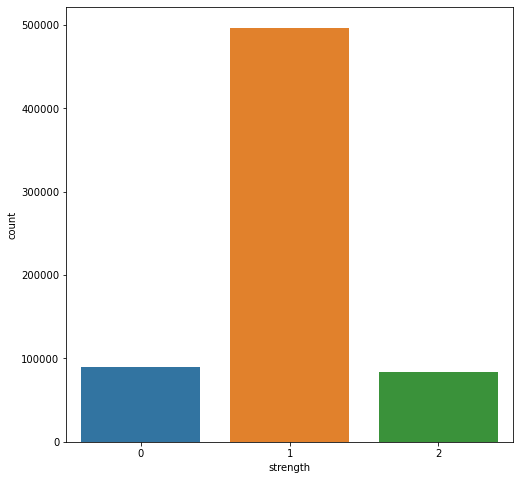

In [19]:
# Using seaborn

plt.figure(figsize=(8,8))
sns.countplot(dataset.strength)

As we can see count of class 1 is every high compared to class 0 and class 2

In [20]:
# Now, I'll convert my data to array

password_ = np.array(dataset)
password_

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [21]:
type(password_)

numpy.ndarray

In [22]:
password_[0]

array(['kzde5577', 1], dtype=object)

In [23]:
# Extracting the password from data

password_[0][0]

'kzde5577'

In [24]:
# What Shuffling does is that it makes the model robust.

random.shuffle(password_)

In [25]:
password_

array([['kzde5577', 1],
       ['kino3434', 1],
       ['kzde5577', 1],
       ...,
       ['e9ai0eo', 0],
       ['pupinas123', 1],
       ['byqaxol241', 1]], dtype=object)

In [26]:
# Creating a Dependant and Independant feature

X = [passwords[0] for passwords in password_]

y = [passwords[1] for passwords in password_]

In [27]:
# Lets check passwords

X

['kzde5577',
 'kino3434',
 'kzde5577',
 'kino3434',
 'kzde5577',
 'lamborghin1',
 'u6c8vhow',
 'u6c8vhow',
 'kzde5577',
 'lamborghin1',
 'visi7k1yr',
 'universe2908',
 'AVYq1lDE4MgAZfNt',
 'v1118714',
 'WUt9IZzE0OQ7PkNE',
 'g067057895',
 'lamborghin1',
 'asv5o9yu',
 '6975038lp',
 'AVYq1lDE4MgAZfNt',
 'jerusalem393',
 'WUt9IZzE0OQ7PkNE',
 'idofo673',
 'jerusalem393',
 'v1118714',
 'lamborghin1',
 'elyass15@ajilent-ci',
 'kino3434',
 'as326159',
 '0169395484a',
 'v1118714',
 'v1118714',
 'megzy123',
 'intel1',
 '6975038lp',
 'jerusalem393',
 'gaymaids1',
 '0169395484a',
 'cigicigi123',
 'gaymaids1',
 'idofo673',
 'lamborghin1',
 'jytifok873',
 'elyass15@ajilent-ci',
 'megzy123',
 '52558000aaa',
 'megzy123',
 'v1118714',
 'asv5o9yu',
 'ejeko677',
 'megzy123',
 'faranumar91',
 'kswa2mrv',
 'asgaliu11',
 'fahad123',
 'asv5o9yu',
 'trabajonet9',
 'intel1',
 'prisonbreak1',
 'calcifer32',
 'exitos2009',
 'bozoxik602',
 'ejeko677',
 'ejeko677',
 'prisonbreak1',
 'WUt9IZzE0OQ7PkNE',
 'khmer100.

In [28]:
type(X)

list

In [29]:
# Converting Words into Characters

def make_chars(inputs):
    characters=[]
    for letter in inputs:
        characters.append(letter)
    return characters

In [30]:
make_chars("TIME WHISPERS")

['T', 'I', 'M', 'E', ' ', 'W', 'H', 'I', 'S', 'P', 'E', 'R', 'S']

In [31]:
# Making an instance for TfidfVectorizer
# Tfidf stands for Term Frequency and Inverse Document Frequency

vectorizer = TfidfVectorizer(tokenizer = make_chars)

In [32]:
X_ = vectorizer.fit_transform(X)

In [33]:
X_.shape

(669639, 133)

In [34]:
vectorizer.get_feature_names()

['\x01',
 '\x02',
 '\x04',
 '\x05',
 '\x08',
 '\x0e',
 '\x0f',
 '\x10',
 '\x12',
 '\x13',
 '\x16',
 '\x17',
 '\x18',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\xa0',
 '¡',
 '¦',
 '¨',
 '«',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '»',
 '¼',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'è',
 'ê',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ý',
 'þ',
 'ÿ',
 '‚',
 '…']

In [35]:
# As an output we will be getting sparse matrix and sparse matrix is mostly of zeros

X_[0]

<1x133 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [36]:
first_ = X_[0].T.todense()

In [37]:
vec = pd.DataFrame(first_,index=vectorizer.get_feature_names(), columns = ['tfidf'])

In [38]:
vec

,tfidf
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
ý,0.0
þ,0.0
ÿ,0.0
‚,0.0


In [39]:
vec.sort_values(by=['tfidf'],ascending=False)

,tfidf
7,0.591862
5,0.566695
z,0.335462
k,0.291954
d,0.285960
...,...
6,0.000000
4,0.000000
3,0.000000
2,0.000000


In [40]:
# Now we are going to divide our data into training and testing purpose

x_train, x_test, y_train, y_test = train_test_split(X_, y, test_size=0.27, random_state=42)

In [41]:
x_train.shape,x_test.shape

((488836, 133), (180803, 133))

In [42]:
# Model Making

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score 

In [43]:
classifier = []
classifier.append(LogisticRegression(multi_class='ovr',n_jobs=-1))
classifier.append(LogisticRegression(multi_class='multinomial',solver='newton-cg',n_jobs=-1))
classifier.append(xgb.XGBClassifier(n_jobs=-1))
classifier.append(MultinomialNB())

In [44]:
classifier

[LogisticRegression(multi_class='ovr', n_jobs=-1),
 LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='newton-cg'),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=-1, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 MultinomialNB()]

In [45]:
# Please be patient as this will take about two hours to compile.

result = []
for model in classifier:
    a = model.fit(x_train,y_train)
    result.append(a.score(x_test,y_test))

In [46]:
result1 = pd.DataFrame({'score':result,
                      'algorithms': ['logistic_regr_ovr',
                                    'logistic_regr_mutinomial',
                                    'xgboost','naive bayes']})

In [47]:
result1

,score,algorithms
0,0.814074,logistic_regr_ovr
1,0.820716,logistic_regr_mutinomial
2,0.985415,xgboost
3,0.743887,naive bayes


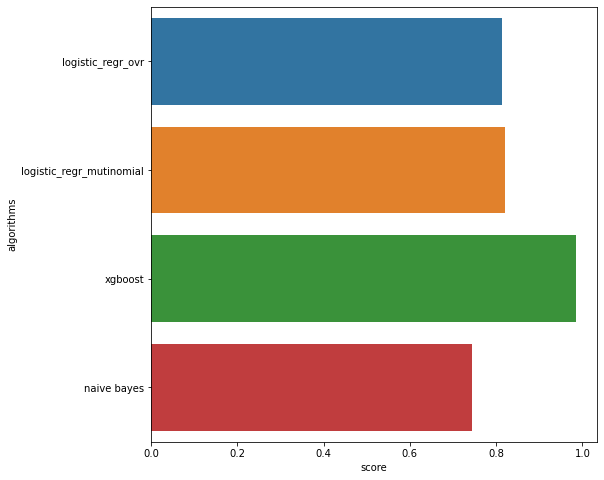

In [48]:
plt.figure(figsize=(8,8))
a=sns.barplot('score','algorithms',data=result1)
a.set_label('accuracy')

As we can see that XGBoost performs good for that given data

In [49]:
xgb_classifier = xgb.XGBClassifier(n_jobs=-1)

In [62]:
# Please be patient as this will take about two hours to compile.

xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [63]:
pred = xgb_classifier.predict(x_test)

In [64]:
confusion_matrix(y_test,pred)

array([[ 22985,   1142,      0],
       [   760, 133352,    204],
       [     2,    529,  21829]])

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     24127
           1       0.99      0.99      0.99    134316
           2       0.99      0.98      0.98     22360

    accuracy                           0.99    180803
   macro avg       0.98      0.97      0.98    180803
weighted avg       0.99      0.99      0.99    180803



In [66]:
import dill
model_file=open("xgb_classifier.pkl","wb")
dill.dump(xgb_classifier,model_file)
model_file.close()

In [67]:
dill.dump(vectorizer, open("vectorizer.pkl", "wb"))

In [119]:
# Testing the password strength

password = "sBHadsY@1LKJKH%1"

In [120]:
password = vectorizer.transform([password])

In [121]:
# 0 denotes weak
# 1 denotes normal
# 2 denotes strong

xgb_classifier.predict(password)

array([2])

In [122]:
# Prediciting the probability

a = xgb_classifier.predict_proba(password)

In [123]:
a

array([[1.2597349e-05, 1.6435471e-01, 8.3563268e-01]], dtype=float32)

In [124]:
a[0][1]

0.16435471